<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-04-02 19:41:50--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-04-02 19:41:51--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2023-04-02 19:41:51 (5.24 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-04-02 19:41:51--
Total wall clock time: 0.2s
Downloaded: 1 files, 60K in 0.01s (5.24 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

df_2 = df[["Survived","Pclass","Sex","Age","SibSp","Parch"]]
df_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
# Antes de borrar NaN se ven la cantidad de observaciones.
observaciones = df_2.shape[0]
print(f"La cantidad de filas a analizar es (con NaN): {observaciones:.2f} ")

La cantidad de filas a analizar es (con NaN): 891.00 


In [7]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
#df_2.dropna(subset=["Age"], inplace=True)
df_2 = df_2.dropna()

In [8]:
df_2.reset_index(drop=True)


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
709,0,3,female,39.0,0,5
710,0,2,male,27.0,0,0
711,1,1,female,19.0,0,0
712,1,1,male,26.0,0,0


In [9]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar

observaciones = df_2.shape[0]
print(f"La cantidad de filas a analizar es (sin NaN): {observaciones:.2f} ")

La cantidad de filas a analizar es (sin NaN): 714.00 


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [10]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [11]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o no

df_2["Survived"].value_counts()

0    424
1    290
Name: Survived, dtype: int64

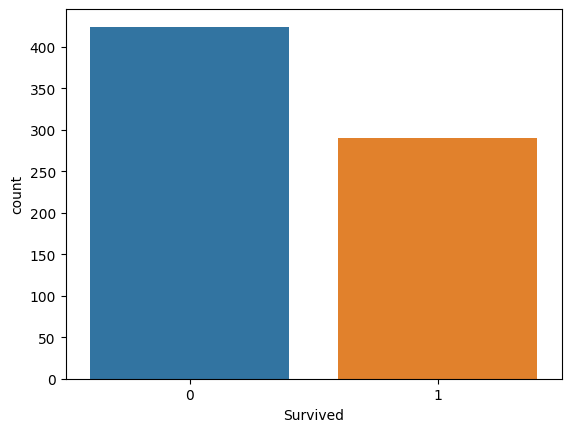

In [12]:
sns.countplot(data=df_2, x="Survived")

plt.show()

# Leyendo el grafico determino que sobrevivieron aproximadamente 290 personas.

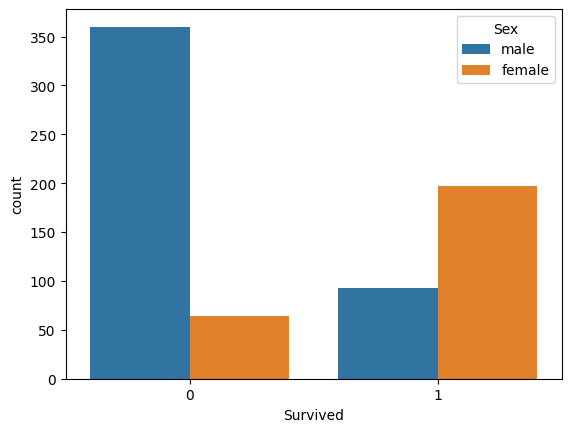

In [13]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data=df_2, x="Survived", hue="Sex")

plt.show()

# Sobrevivieron más mujeres lo cuál es lógico si se se hace caso a la famosa 
# frase: "Mujeres y niños primero", al hundirse un barco.

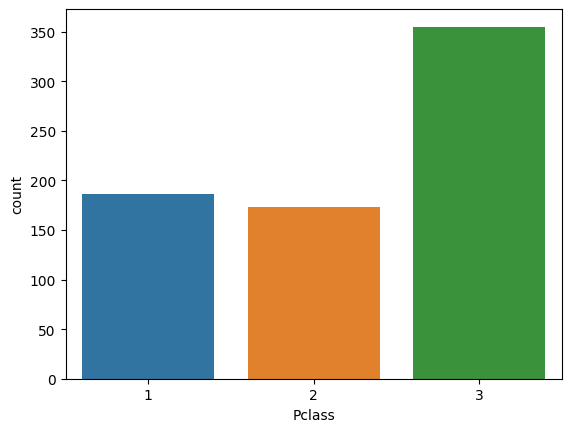

In [14]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

sns.countplot(data=df_2, x="Pclass")

plt.show()

# Habia aproximadamente 350 pasajeros de 3er clase, 170 de 2da y 175 de 3ra.

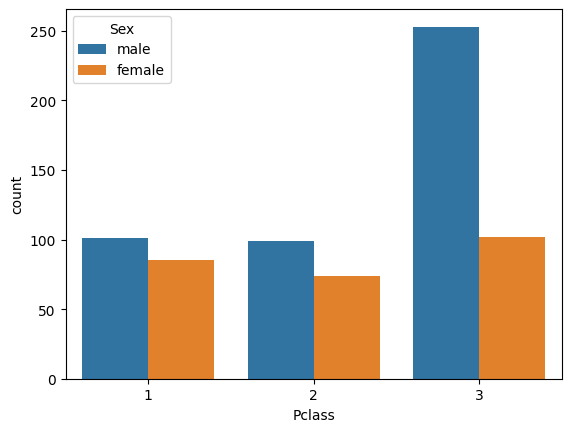

In [15]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(data=df_2, x="Pclass", hue="Sex")

plt.show()

# Habían aproximadamente la siguiente cantidad de pasajeros.
# Mujeres: 100 pasajeras de 3er clase, 70 de 2da y 75 de 1ra.
# Hombres: 250 pasajeros de 3er clase, 100 de 2da y 100 de 1ra.

#### Transformar variables categóricas texto a clases numeradas

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

df_cod = df_2.copy()
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [18]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

le_sex = LabelEncoder()
label_encoding = le_sex.fit_transform(df_cod["Sex"])

df_cod['Sex'] = label_encoding
df_cod.head()



,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [19]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

clases = le_sex.classes_
print("Las clases que ha detectado el encoder son:",clases[0]+" y "+clases[1])


Las clases que ha detectado el encoder son: female y male


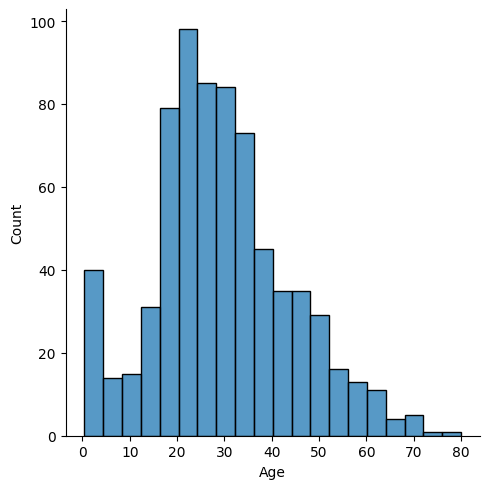

In [20]:
# Alumno: Analizar la distribución de la edad

sns.displot(data=df_cod, x='Age')
plt.show()

In [21]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

df_norm = df_cod.copy()

In [22]:
# Alumno: utilizar StandarScaler para normalizar la columna de "Age"
# Conservar el scaler que lo necesitará para el final


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_norm.loc[:, 'Age'] = scaler.fit_transform(df_norm[['Age']])

# Observar las  5 primeras filas
df_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [23]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

x = df_cod.drop("Survived", axis=1).values
y = df_cod["Survived"].values


In [24]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape

# Entradas
in_shape = x.shape[1] # El [1] indica que solo toma en cuenta el número de columnas --> 6
in_shape


5

In [25]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea

# Salidas
# Es 1, ya que obtendremos un resultado; será uno (Survived) ó cero (Didn't Survived)
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [26]:
# Alumno, generar los dataset de train y test superando en 80%20%

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

def create_model(input_size, hidden_neurons, output_size):

  # Se crea el objeto modelo a partir de la clase Sequential()
  model = Sequential()

  # Se crean la capa de entrada y la capa oculta    
  model.add(Dense(units=hidden_neurons, activation='sigmoid', input_shape=(input_size,)))

  # Se crea la capa de salida
  model.add(Dense(units=output_size, activation='sigmoid'))

  return model


In [28]:
model = create_model(in_shape, 64, out_shape)

In [29]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"

import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [30]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"

history = model.fit(x_train, y_train, validation_split=0.2 , epochs=100, batch_size=64)

Epoch 1/100
8/8 [==============================] - 6s 29ms/step - loss: 0.7549 - accuracy: 0.4430 - val_loss: 0.7342 - val_accuracy: 0.5478
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6864 - accuracy: 0.6009 - val_loss: 0.7045 - val_accuracy: 0.5565
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6624 - accuracy: 0.6294 - val_loss: 0.6772 - val_accuracy: 0.6348
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6596 - accuracy: 0.6447 - val_loss: 0.6781 - val_accuracy: 0.5652
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6629 - accuracy: 0.6338 - val_loss: 0.7091 - val_accuracy: 0.5826
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6472 - accuracy: 0.6316 - val_loss: 0.6611 - val_accuracy: 0.6087
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6439 - accuracy: 0.6623 - val_loss: 0.6564 - val_accuracy: 0.5826
Epoch 8/100
8/8 [========

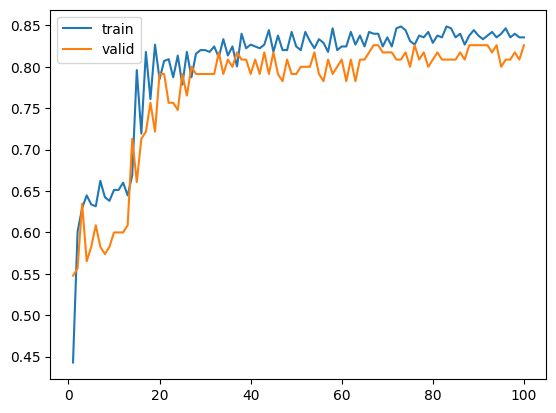

In [31]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line


epocas_conteo= range(1, len(history.history['accuracy']) + 1)


sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [32]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test

y_hat_prob = model.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [33]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat

y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [34]:
# Alumno, calcular la exactitud (accuracy) de su modelo

# Metodo 1

scores = model.evaluate(x_test, y_test)

scores[1]



5/5 [==============================] - 0s 5ms/step - loss: 0.4617 - accuracy: 0.7902


0.7902097702026367

In [35]:
# Metodo 2

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7902097902097902

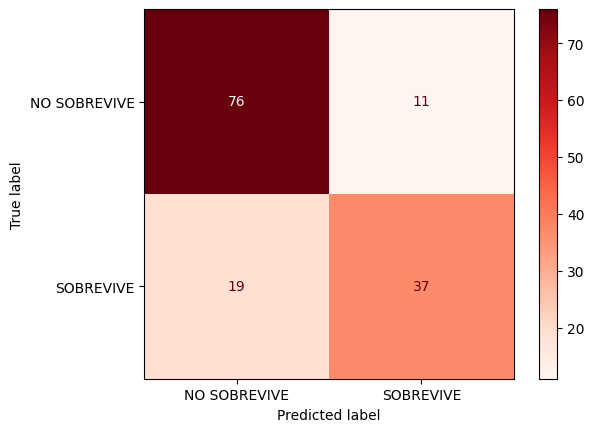

In [36]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_hat)

cmd = ConfusionMatrixDisplay(cm, display_labels=['NO SOBREVIVE', 'SOBREVIVE'])


cmd.plot(cmap=plt.cm.Reds)

plt.show()



# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [37]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo
Pclass = 3
Sex = "female"
Age = 20
SibSp = 0
Parch = 2

# Casteamos el array que devuelve le.transform a int
sex_encoded = int(le_sex.transform([Sex]))

age_norm = float(scaler.transform([[Age]]))

X_prueba = np.array([Pclass, sex_encoded, age_norm, SibSp, Parch])

X_prueba_V2 = X_prueba.reshape(1, -1)

y_prueba = float(model.predict(X_prueba_V2))

if y_prueba >= 0.5:
    print("La persona de prueba sobrevivió! Enhorabuena!! \(^^)/")
else:
    print("La persona de prueba ha fallecido.. Mi más sentido pésame :c")

1/1 [==============================] - 0s 26ms/step
La persona de prueba sobrevivió! Enhorabuena!! \(^^)/


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
